In [7]:
# imports

import pandas as pd
import numpy as np
import mlflow.sklearn

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("reddit_preprocessed.csv")
df.head()

,clean_comment,category,words,stop_words,characters,punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [3]:
import mlflow

mlflow.set_tracking_uri("http://ec2-18-219-243-234.us-east-2.compute.amazonaws.com:5000/")

In [4]:
mlflow.set_experiment("BoW VS TFIDF - comparison")


2025/08/28 11:51:12 INFO mlflow.tracking.fluent: Experiment with name 'BoW VS TFIDF - comparison' does not exist. Creating a new experiment.


<Experiment: artifact_location='s3://mlflow-bucket-078/954266026780591784', creation_time=1756392668927, experiment_id='954266026780591784', last_update_time=1756392668927, lifecycle_stage='active', name='BoW VS TFIDF - comparison', tags={}>

2025/08/28 12:30:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/28 12:30:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest_CountVectorizer_(1, 1) at: http://ec2-18-219-243-234.us-east-2.compute.amazonaws.com:5000/#/experiments/954266026780591784/runs/826e9a9e3e184bf98e8e711fecd623fd
🧪 View experiment at: http://ec2-18-219-243-234.us-east-2.compute.amazonaws.com:5000/#/experiments/954266026780591784


2025/08/28 12:30:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/28 12:31:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest_TfidfVectorizer_(1, 1) at: http://ec2-18-219-243-234.us-east-2.compute.amazonaws.com:5000/#/experiments/954266026780591784/runs/9f85e356ab0a4404ac33c927fc47f990
🧪 View experiment at: http://ec2-18-219-243-234.us-east-2.compute.amazonaws.com:5000/#/experiments/954266026780591784


2025/08/28 12:31:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/28 12:31:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest_CountVectorizer_(1, 2) at: http://ec2-18-219-243-234.us-east-2.compute.amazonaws.com:5000/#/experiments/954266026780591784/runs/d472dc3d350842998a3c93c02b8a48b8
🧪 View experiment at: http://ec2-18-219-243-234.us-east-2.compute.amazonaws.com:5000/#/experiments/954266026780591784


2025/08/28 12:32:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/28 12:32:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest_TfidfVectorizer_(1, 2) at: http://ec2-18-219-243-234.us-east-2.compute.amazonaws.com:5000/#/experiments/954266026780591784/runs/dcb37575cc1c4878a11ed5d49644a4ff
🧪 View experiment at: http://ec2-18-219-243-234.us-east-2.compute.amazonaws.com:5000/#/experiments/954266026780591784


2025/08/28 12:33:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/28 12:33:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest_CountVectorizer_(1, 3) at: http://ec2-18-219-243-234.us-east-2.compute.amazonaws.com:5000/#/experiments/954266026780591784/runs/30f0dac4c2584bfd901bf4e3aa09ed8c
🧪 View experiment at: http://ec2-18-219-243-234.us-east-2.compute.amazonaws.com:5000/#/experiments/954266026780591784


2025/08/28 12:34:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/28 12:34:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest_TfidfVectorizer_(1, 3) at: http://ec2-18-219-243-234.us-east-2.compute.amazonaws.com:5000/#/experiments/954266026780591784/runs/6e35e90ce5624f29a2510a81781b6e63
🧪 View experiment at: http://ec2-18-219-243-234.us-east-2.compute.amazonaws.com:5000/#/experiments/954266026780591784


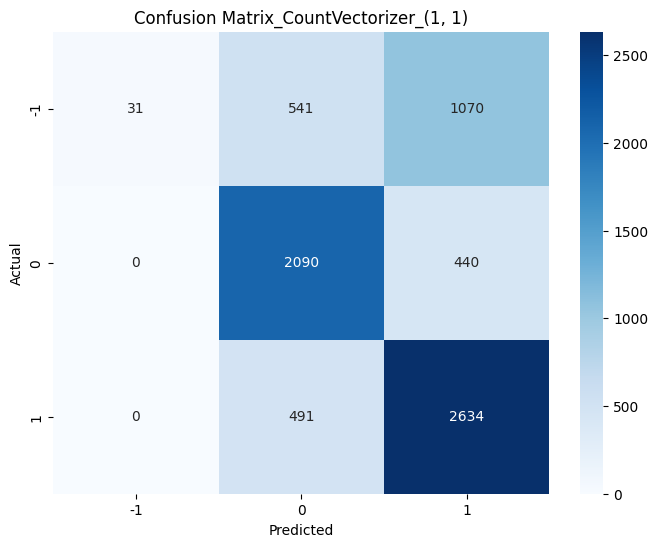

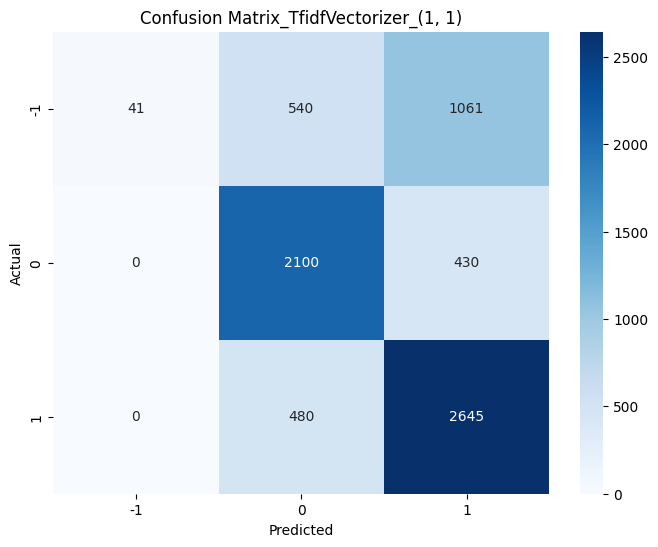

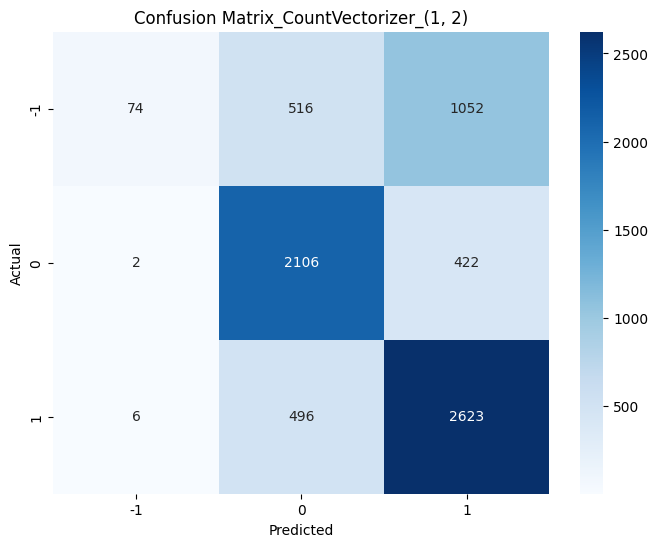

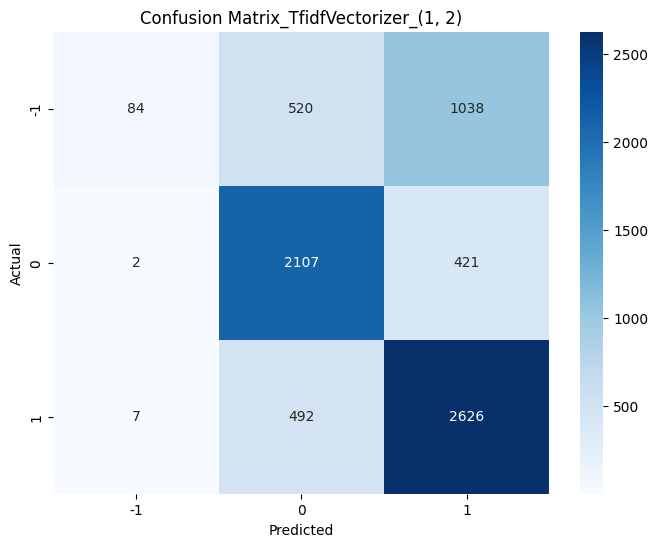

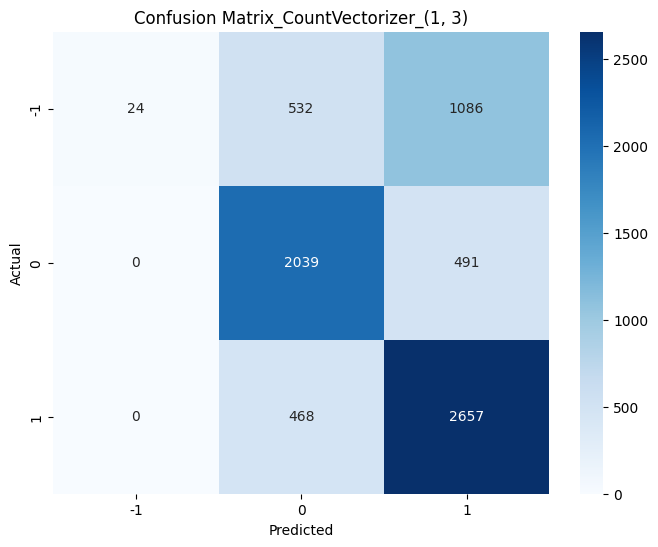

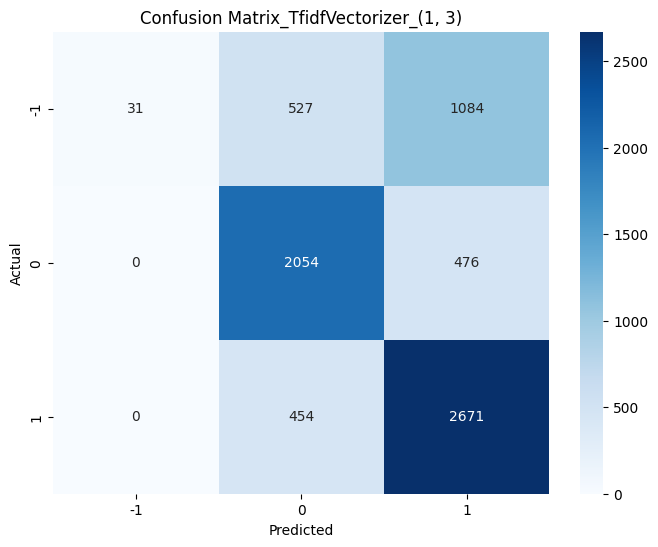

In [8]:
def run_experiment(vec_type, ngram_range, max_features, df, feature_column, target_column):
    
    if vec_type.lower() == "bow": 
        vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=max_features)
        vec_name = "CountVectorizer"
    elif vec_type.lower() == "tfidf": 
        vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)
        vec_name = "TfidfVectorizer"
    else:
        print("Invalid vectorizer type, choose bow or tfidf")
        return 
    
    X_train, X_test, y_train, y_test = train_test_split(df[feature_column], df[target_column], test_size=0.2, random_state=0)

    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test) # correct way to do it, without data leakage
    
    with mlflow.start_run() as run:
        # Experiments tags
        mlflow.set_tag("mlflow.runName", f"RandomForest_{vec_name}_{ngram_range}")
        mlflow.set_tag("experiment_type", "vectorizer_comparison")
        mlflow.set_tag("model_type", "RandomForestClassifier")
        mlflow.set_tag("Description", "Experiment to compare the two types of vectorization(BoW or TFIDF)")

        # parameters for vectorizer and model
        mlflow.log_param("vectorizer_type", vec_name)
        mlflow.log_param("vectorizer_maxfeatures", max_features)
        mlflow.log_param("vectorizer_ngramrange", ngram_range)

        mlflow.log_param("n_estimators", 200)
        mlflow.log_param("max_depth", 15)

        comparison_model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=0)
        comparison_model.fit(X_train, y_train)
        predictions = comparison_model.predict(X_test)

        comparison_accuracy = accuracy_score(y_test, predictions)

        mlflow.log_metric("accuracy", comparison_accuracy)

        classification_rep = classification_report(y_test, predictions, output_dict=True)

        for label, metrics in classification_rep.items():
            if isinstance(metrics, dict):  # For precision, recall, f1-score, etc.
                for metric, value in metrics.items():
                    mlflow.log_metric(f"{label}_{metric}", value)

        class_names = [-1,0,1]

        # Confusion matrix plot
        conf_matrix = confusion_matrix(y_test, predictions)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"Confusion Matrix_{vec_name}_{ngram_range}")

        # Save and log the confusion matrix plot
        plt.savefig(f"conf_matrices/confusion_matrix_{vec_name}_{ngram_range}.png")
        mlflow.log_artifact(f"confusion_matrix_{vec_name}_{ngram_range}.png")

        mlflow.sklearn.log_model(comparison_model, f"random_forest_{vec_name}_{ngram_range}")

ngram_range_list = [(1,1),(1,2),(1,3)] # unigrams, bigrams and trigrams

for range in ngram_range_list:

    run_experiment('bow', ngram_range=range, max_features=5000, df=df, feature_column= 'clean_comment', target_column= 'category')

    run_experiment('tfidf', ngram_range=range, max_features=5000, df=df, feature_column= 'clean_comment', target_column= 'category')
